## Import libraries

In [223]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

## Use the GPU for training if possible

In [224]:
devices = tf.config.experimental.list_physical_devices("GPU")
if len(devices) > 0:
    tf.config.experimental.set_memory_growth(devices[0], enable=True)

## General functions

In [225]:
# normalize the dataset
def normalize_data(data):
    return data.astype('float32') / 255.

In [226]:
def plot_sample(images, labels, header):
    n = images.shape[0]
    plt.figure(figsize=(20, 4))
    plt.title(f"{header}")
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(f'{labels[i]}')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [227]:
def add_noise(data, _noise_factor = 0.4):
    noisy_data = data + _noise_factor * tf.random.normal(shape=data.shape)
    return tf.clip_by_value(noisy_data, clip_value_min=0., clip_value_max=1.)

In [228]:
def visualize_images(_data, _labels, _rows = 2, _columns = 8):
    fig, axes = plt.subplots(_rows, _columns, figsize = (12, 3))

    for i in range(_rows):
        for j in range(_columns):
            # calculate the index of the current element and print the picture
            cnt = i * _columns + j
            axes[i,j].imshow(_data[cnt], cmap= 'gray')
            axes[i,j].set_title(f'{_labels[cnt]}')

In [229]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

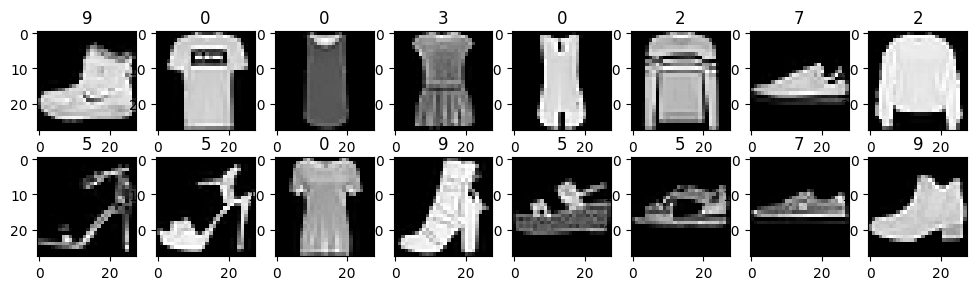

In [230]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
visualize_images(x_train, y_train)

In [231]:
x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

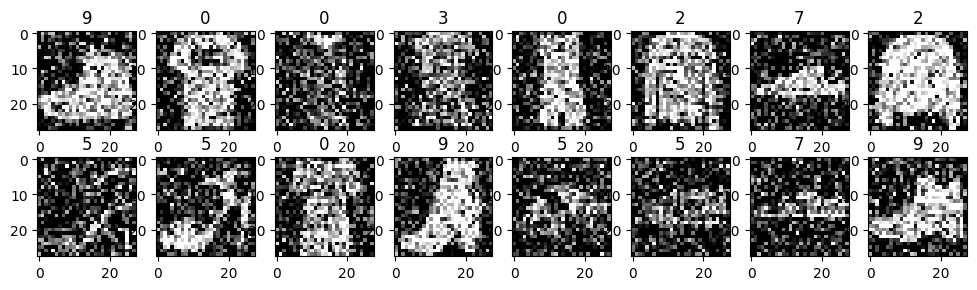

In [232]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)
visualize_images(x_train_noisy, y_train)

In [233]:
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [234]:
history = autoencoder.fit(x_train_noisy, x_train,
                          batch_size=128,
                          epochs=10,
                          shuffle=True,
                          validation_split=0.10,
                          validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - loss: 0.0558 - val_loss: 0.0160
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - loss: 0.0155 - val_loss: 0.0143
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.0141 - val_loss: 0.0137
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - loss: 0.0130 - val_loss: 0.0129
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - loss: 0.0128 - val_loss: 0.0128
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - loss: 0.0125 - val_loss: 0.0125


In [235]:
print(f'{autoencoder.summary()}')
print('---------------------------------')
print(f'{autoencoder.encoder.summary()}')
print('---------------------------------')
print(f'{autoencoder.decoder.summary()}')

Model: "denoise_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_20 (Sequential)      │ (None, 7, 7, 32)       │         9,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_21 (Sequential)      │ (None, 28, 28, 1)      │        18,785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,061 (332.27 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,708 (221.52 KB)

None
---------------------------------


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,568 (37.38 KB)

 Trainable params: 9,568 (37.38 KB)

 Non-trainable params: 0 (0.00 B)

None
---------------------------------


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_20             │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_21             │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,785 (73.38 KB)

 Trainable params: 18,785 (73.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [236]:
encoded_images = autoencoder.encoder(x_test_noisy).numpy()
decoded_images = autoencoder.decoder(encoded_images).numpy()

## Visualize the results

At first, we will print the original images and below the images from the denoised images to see the difference. Additionally, the images including noise will be printed again, to see the difference from the input and the output.

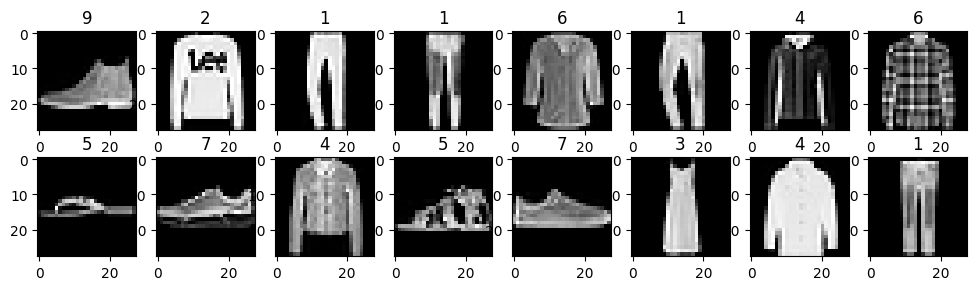

In [237]:
visualize_images(x_test, y_test)

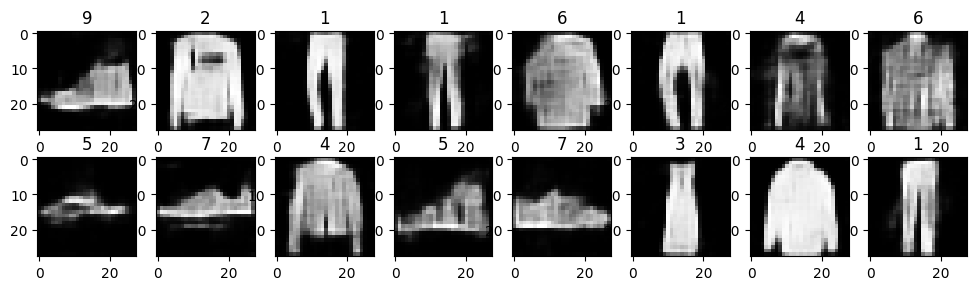

In [238]:
visualize_images(decoded_images, y_test)

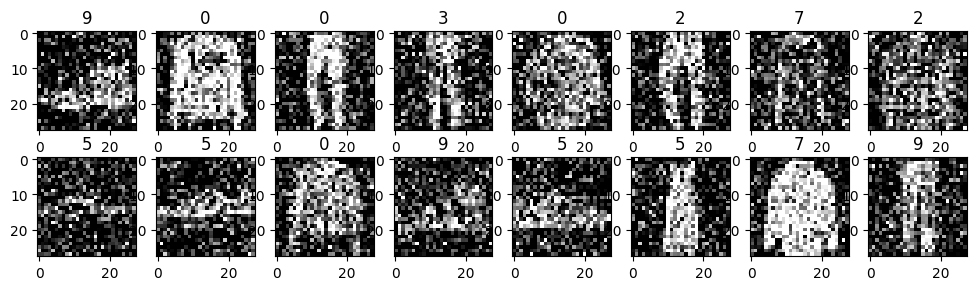

In [241]:
visualize_images(x_test_noisy, y_train)

## Loss function

Let's print a loss function to get the training and validation loss. The loss function and error function quantify how well the model reconstructs the original, clean data from its noisy version.

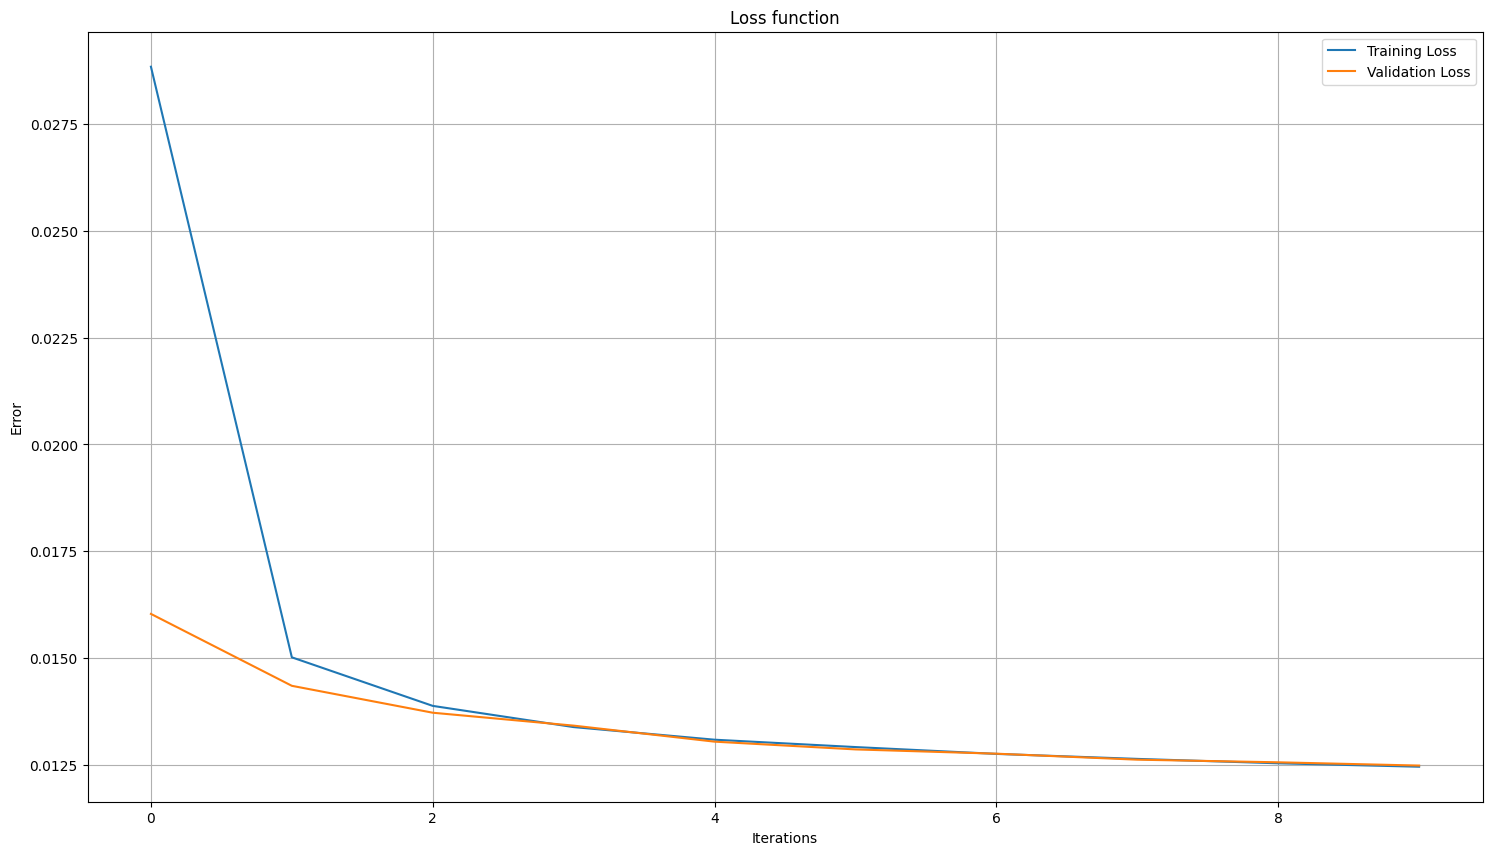

In [240]:
plt.figure(figsize=(18,10))
plt.title("Loss function")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()